# Consensus Income Classification Data Analysis

## Introduction

In the workforce, many factors can influence an individual’s salary. These can include (but are not limited to): level of education, occupation, age, sex, and race. Data from the U.S. Bureau of Labor Statistics found that men working in management earned more than their female counterparts, while people working in the service industry generally made the smallest salaries. In our project, we will design a classification model that will predict if an individual will make more than or less than $50,000, based on specific predictors. 

Would an 18 year old high school graduate working 40 hours per week have made more or less than $50,000 annually in 1994?

This dataset came from the UCI Machine Learning Repository and summarizes U.S. census data from 1994. It contains variables identifying age, work class, education, marital status, occupation, relationship, race, sex, capital gain and loss, hours per week, and native country. The variables influence whether an individual makes less than or more than \\$50,000. We will select specific variables to predict an individual’s categorical salary (less than or greater than \\$50,000).

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6) #displays maximum of 6 rows of dataframe

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Preliminary Exploratory Data Analysis

In [2]:
options(repr.plot.width = 8, repr.plot.height = 7)
set.seed(2022)
consensus_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", col_names = FALSE)
colnames(consensus_data) <- c("age", "workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")
consensus_data <- mutate(consensus_data, income = as_factor(income))
#consensus_data

consensus_subset <- consensus_data |>
                     select(age, education_num, hours_per_week, income)
consensus_subset


Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,education_num,hours_per_week,income
<dbl>,<dbl>,<dbl>,<fct>
39,13,40,<=50K
50,13,13,<=50K
38,9,40,<=50K
⋮,⋮,⋮,⋮
58,9,40,<=50K
22,9,20,<=50K
52,9,40,>50K


In [3]:
#Splitting data into 75% training and 25% testing sets
consensus_split <- initial_split(consensus_subset, prop = 3/4, strata = income)
consensus_training <- training(consensus_split) 
consensus_testing <- testing(consensus_split)
#consensus_training


In [4]:
# Summarizing number of observations per classification category
counts <- group_by(consensus_training, income) |>
          summarize(n = n())
counts

income,n
<fct>,<int>
<=50K,18540
>50K,5880


In [5]:
#Means of the predictor variables that will be used within the analysis
predictor_averages <- consensus_training |>
                      select(-income)|>
                      summarize(across(age:hours_per_week, mean, na.rm = TRUE))
predictor_averages

age,education_num,hours_per_week
<dbl>,<dbl>,<dbl>
38.57719,10.07707,40.44496


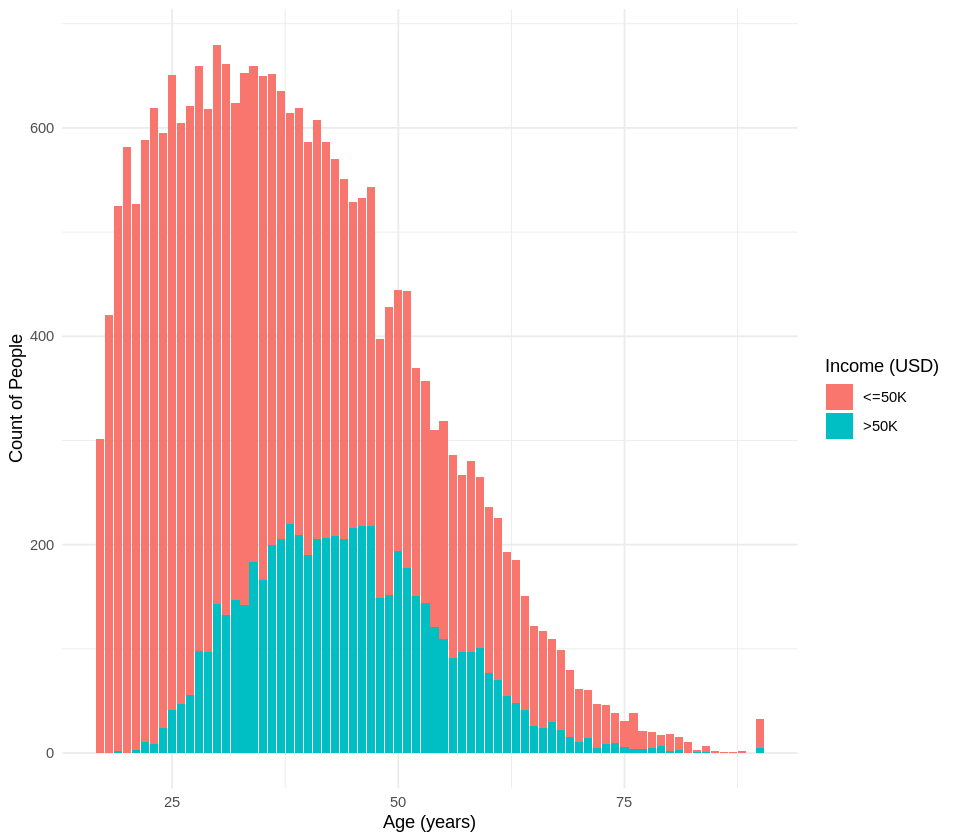

In [6]:
#bar chart to view age and income
age_v_income <- ggplot(consensus_training, aes(x = age))+
                geom_bar(aes(fill = income))+
                labs(x = "Age (years)", y = "Count of People", fill = "Income (USD)")+
                theme_minimal()
age_v_income

Figure 1

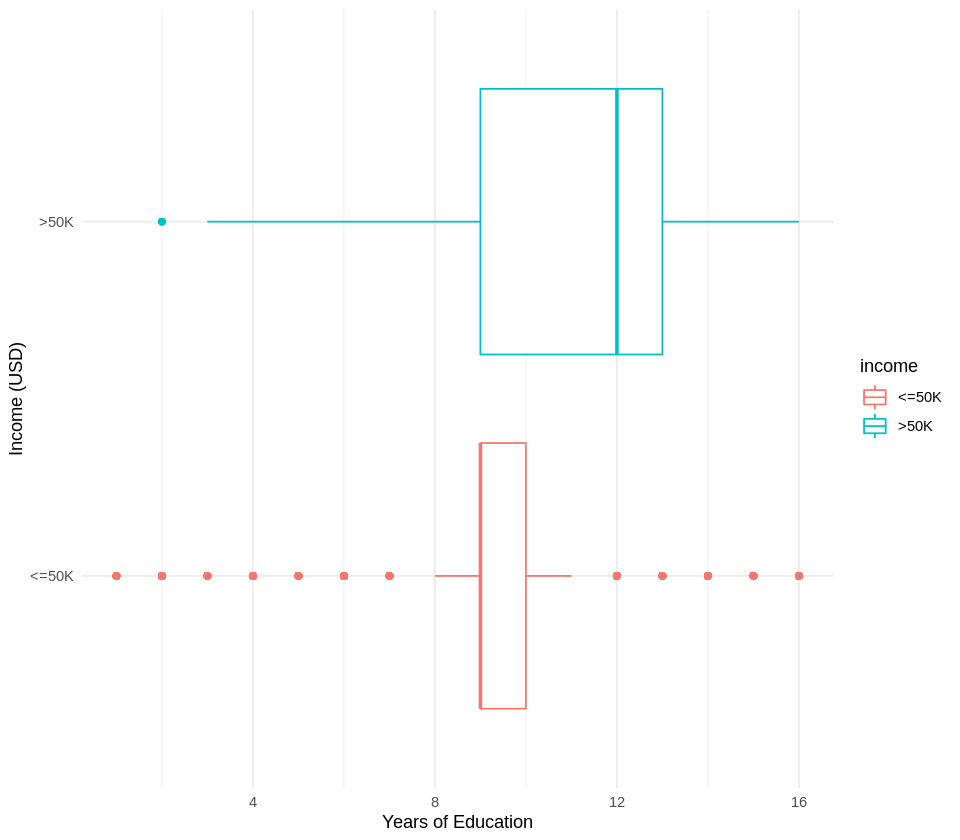

In [31]:
#box and whiskers plot for education years and income
education_number_v_income_bw <- ggplot(consensus_training, aes(x = education_num, y = income, color = income))+
                                geom_boxplot()+
                                labs(x = "Years of Education", y = "Income (USD)")+
                                theme_minimal()
education_number_v_income_bw

Figure 2

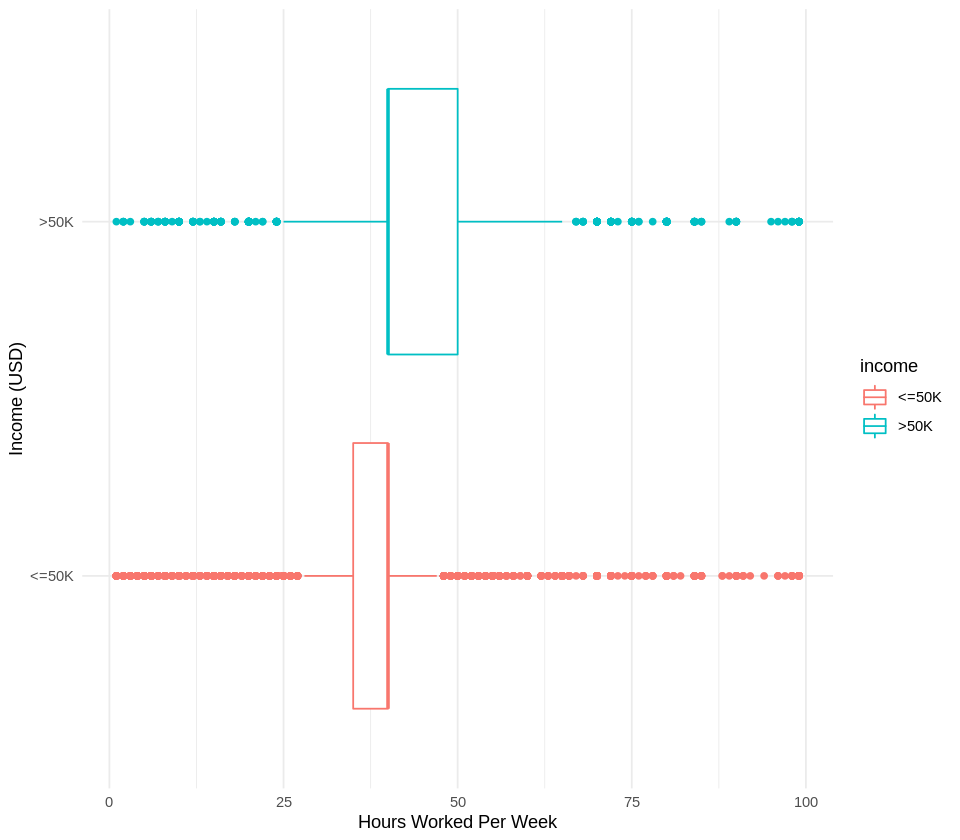

In [32]:
#box and whiskers plot for hours per week and income
hours_per_week_v_income_bw <- ggplot(consensus_training, aes(x = hours_per_week, y = income, color = income))+
                                geom_boxplot()+
                                labs(x = "Hours Worked Per Week", y = "Income (USD)")+
                                theme_minimal()
hours_per_week_v_income_bw

Figure 3

## Methods

We will use the K-nearest neighbors model to find the K value that helps us obtain the most accurate prediction for our classification. We will use the variables: age, years of education, and hours worked per week to predict if a U.S. citizen's income is greater or less than $50,000. Because there are a variety of variables within our dataset, we first selected the columns containing numeric values. From those, we chose the three variables listed above, as we believe they will be the best predictors for answering our question.

To visualize the results of our knn tuning model, we will make a line plot with the number of neighbors on the x-axis and the estimated accuracy on the y-axis. From the graph, we can choose the k value which will most accurately predict our classification.

## Expected outcomes and significance

We expect to find a correlation between our predictors (age, hours worked per week, level of education) and an individual’s salary. Based on figures in the preliminary data analysis, our hypothesis is that an individual is more likely to make over $50,000 as these specific predictors increase.

In general, our findings could provide insight on the importance of education in choosing a career path. We may also see income disparity among our selected predictors, which can be informative for suggesting what status the U.S. economy favors. Additionally, our investigation could be beneficial for a student’s decision of continuing their education or entering the workforce.

As this data is from an old census, a future question could be to investigate these same predictors with more recent data and see how income disparity has shifted among age, hours worked per week, and education level. Furthermore, we could analyze global events and the shift in western culture to ask if they have made a recent impact on income patterns, using the same predictors.